# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#otros paquetes
import sys
print('Python version:', sys.version)
import IPython
print('IPython:', IPython.__version__)
import numpy
print('numpy:', numpy.__version__)
import scipy
print('scipy:', scipy.__version__)
import matplotlib
print('matplotlib:', matplotlib.__version__)
import pandas
print('pandas:', pandas.__version__)
import sklearn
print('scikit-learn:', sklearn.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
IPython: 6.2.1
numpy: 1.14.0
scipy: 1.0.0
matplotlib: 2.1.2
pandas: 0.22.0
scikit-learn: 0.19.1


In [3]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [3]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [5]:
X = data.drop(['Label'], axis=1)
y = data['Label']
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

paso 1: revisión de la data que no tenga valores missing.

conclusion: no tiene valores missing por lo cual no se debe hacer ningun tratamiento de datos faltantes.

In [6]:

data.isnull().sum()


accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

paso 2: descripcion de las variables.  la variable objetivo hace referencia a la variable Label en donde label=  0 siginifica  no Fraude y 1 significa fraude

conclusión:  el 99% de la variable label  corresponde a no fraude y tan solo en 1% a fraude con  797 casos de 138.721 total de la base de datos. 

In [7]:
data['Label'].describe()

count    138721.000000
mean          0.005745
std           0.075580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Label, dtype: float64

In [8]:
data['Label'].value_counts()

0    137924
1       797
Name: Label, dtype: int64

Paso 3. dividir la data en test and train, en este caso el random_state=1 significa que la data se divide en 25% para test 
y el restante para train. esto es tan solo una forma arbitraria de dividir la base de datos.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Paso 4.continuacion se corre el modelo de regresion logistica sin usar k fold, con el objetivo de revisar el accurancy 
del modelo.

In [10]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Paso 5. predicciones

In [11]:
# make predictions for testing set
y_pred_class = logreg.predict(X_test)

Paso 6. calculate testing accuracy

Para la intepretacion se debe tener en cuenta las siguientes definiciones:

Condition positive (P) : the number of real positive cases in the data
Condition negative (N) : the number of real negative cases in the data
True positive (TP) 
True negative (TN)
False positive (FP): Type I error
False negative (FN) : eqv. with miss, Type II error

accuracy (ACC) = (TP + TN)/ P + N  = (TP + TN)/ TP + TN + FP + FN

In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9939736455119518


Conclusión: la exactitud o ACC del modelo es alta ya que se acerca a 1. es decir que en los casos positivos que predijo 
el modelo sobre el total de la data son acertados en un 99% de los casos.

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[34472,     0],
       [  209,     0]], dtype=int64)

Matrix de confusion: de acuerdo a los resultados que arroja la matrix de confusión  los falsos positivos son cero y los true
negativos son cero, luego esto indica que aunque el ACC  sea bueno, al revisar el NPV (negative predicte value) definido 
como NPV= TN/ (TN+FN)=  0 / 0+ 209 = 0; luego no predice de los casos o clases de fraude en la data.

Paso 7.  F1-Score and F_Beta-Score (Beta=10)

Definicion: F1= 2* (PPV * TPR / PPV + TPR) = 2PT / (2TP + FP + FN)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))


precision_score  0.0
recall_score     0.0
f1_score     0.0


C:\Users\ERIKA ANGEL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ERIKA ANGEL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Se genera error en el codigo ya que  los falsos positivos y los verdaderos positivos son cero, luego hace indeterminado el indicador. ( denominador cero).

paso 8. K-fold cross-validation : se realiza cross validation con el objetivo de divir la data en k particiones y 
encontrar el mejor modelo en terminos de precision con diferentes muestras. se vuelven a calcular las metricas anteriores 
con la partición de del 25% para test.

In [20]:
# simulate splitting a dataset of n observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(138721, n_folds=11, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(str(iteration), str(data[0]), str(data[1])))

    #Dataset contains 138721 observations (numbered 0 through 138720)
    #5-fold cross-validation, thus it runs for 5 iterations
    #For each iteration, every observation is either in the training set or the testing set, but not both
    #Every observation is in the testing set exactly once
    

Iteration                   Training set observations                   Testing set observations
    1     [ 12611  12612  12613 ... 138718 138719 138720] [    0     1     2 ... 12608 12609 12610]
    2     [     0      1      2 ... 138718 138719 138720] [12611 12612 12613 ... 25219 25220 25221]
    3     [     0      1      2 ... 138718 138719 138720] [25222 25223 25224 ... 37830 37831 37832]
    4     [     0      1      2 ... 138718 138719 138720] [37833 37834 37835 ... 50441 50442 50443]
    5     [     0      1      2 ... 138718 138719 138720] [50444 50445 50446 ... 63052 63053 63054]
    6     [     0      1      2 ... 138718 138719 138720] [63055 63056 63057 ... 75663 75664 75665]
    7     [     0      1      2 ... 138718 138719 138720] [75666 75667 75668 ... 88274 88275 88276]
    8     [     0      1      2 ... 138718 138719 138720] [ 88277  88278  88279 ... 100885 100886 100887]
    9     [     0      1      2 ... 138718 138719 138720] [100888 100889 100890 ... 113496 113497

C:\Users\ERIKA ANGEL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
   
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
# Create k-folds
kf = KFold(X.shape[0], n_folds=11, random_state=0)

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [23]:
  # train a logistic regression model

logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
    # make predictions for testing set
y_pred_class = logreg.predict(X_test)

In [25]:
 # calculate testing accuracy
results.append(metrics.accuracy_score(y_test, y_pred_class))

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[12513,     1],
       [   97,     0]], dtype=int64)

Conclusiones Generales:

En el ejercicio primero donde no realizamos cross validation y usamos una particion arbitriaria de la data, 
evidenciabamos que el modelo tenia un buen Accuracy con un valor de 0.993, pero con valor de F1 Score o precision  de 0, lo que siginificaba que no estaba prediciendo correctamente  las clases negativas o los casos de fraude, luego al realizar cross validation en k=11 con los 138721 datos, los falsos negativos disminuyen. 

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

paso 1: Revisión Unbalanced Datasets

Los problemas de clasificación desequilibrada causan problemas a muchos algoritmos de aprendizaje.  Estos  caracterizan cuando la proporcion en este caso de fraude es desigual a los casos de no fraude. La regresion logistica funcionar cuando el número de muestras de cada clase sea aproximadamente la misma en este caso no lo es. Por lo cual antes de correr el modelo la forma de abordar este problema es remuestrear el conjunto de datos.

El metodo selecciona al azar un porcentaje de la clase negativa de modo que el conjunto de datos resultante esté equilibrado, 
reduce la clase positiva para hacer mas relevante la negativa(fraude).

subpasos a continuación:

Plot the original data

Fit and transform x to visualise inside a 2D feature space

Instanciate a PCA object for the sake of easy visualisation

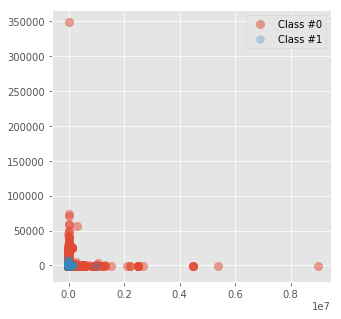

In [34]:

pca = PCA(n_components = 2)
x_vis = pca.fit_transform(X)

def plot_two_classes(X, y, subplot=False, size=(5, 5)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.3, s=60)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y)

Paso 2. usando Under-sample the negative class using random-under-sampling

In [27]:
n_samples = y.shape[0]
print(n_samples)

# 138721 corresponde al total de datos 

138721


In [28]:
n_samples_0 = (y == 0).sum()
n_samples_0

# 137924 corresponde a la clase cero, es decir a la clase de no fraude.

137924

In [29]:
n_samples_1 = (y == 1).sum()
n_samples_1

# 797 casos hacen referencia a la clase 1, es decir los casos marcados como fraude

797

In [30]:
n_samples_1 / n_samples

# 0,005 hace referencia a la tasa de los casos de de fraude/el total de la data, es decir, el porcentaje de la clase negativa.

0.0057453449730033666


¿Cuántos casos negativos debo seleccionar si deseo un nuevo conjunto de datos con el 50% de los aspectos positivos?


0.5 = n_samples_1 / (n_samples_1 + n_samples_0_new)

(n_samples_1 + n_samples_0_new) = n_samples_1 / 0.5

n_samples_1= casos negativos (fraude)
n_samples_0= casos positivos ( no fraude)
n_samples= Total de datos

In [35]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

797.0

In [36]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.005778544705779994

In [37]:
# Select all negatives
filter_ = y == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [38]:
filter_.sum()

757

In [39]:
filter_ = filter_ | (y == 1)

In [40]:
filter_ = filter_.astype(bool)

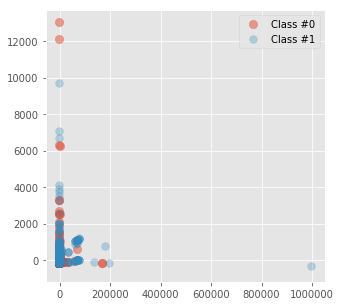

In [41]:
plot_two_classes(x_vis[filter_], y[filter_])

In [43]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  8000 y.mean() =  0.099625


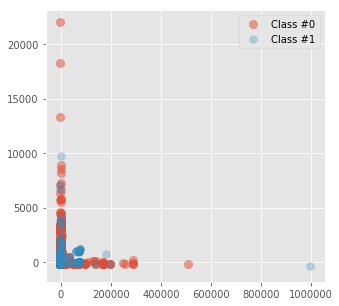

Target percentage 0.2
y.shape =  3992 y.mean() =  0.19964929859719438


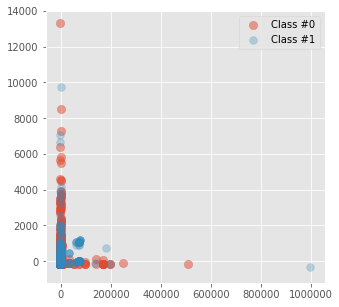

Target percentage 0.3
y.shape =  2615 y.mean() =  0.30478011472275335


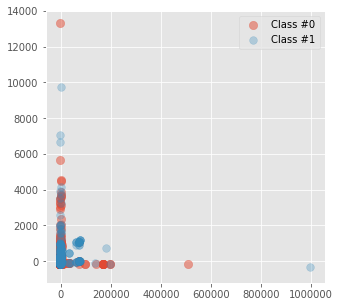

Target percentage 0.4
y.shape =  1956 y.mean() =  0.4074642126789366


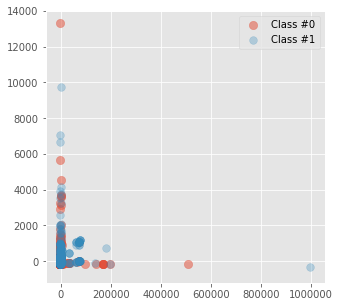

Target percentage 0.5
y.shape =  1585 y.mean() =  0.5028391167192429


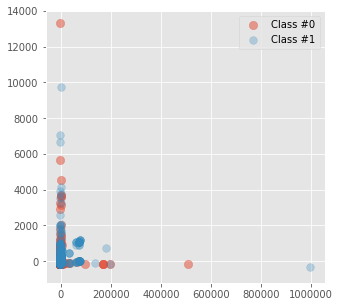

In [44]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show() 

Conclusiones

El parametro escogido en este caso es del 50%, para balancear la clase negativa.

Target percentage 0.5
y.shape =  1585 y.mean() =  0.5028391167192429

# Exercice 04.3

Now using random-over-sampling

Random over-sampling :Consiste en replicar los ejemplos de clase minoritaria para aumentar su relevancia dentro de la data, caso contrario al anterior metodo en donde se disminuia la clase dominante ( No fraude).

In [45]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  153248 y.mean() =  0.09999477970348716


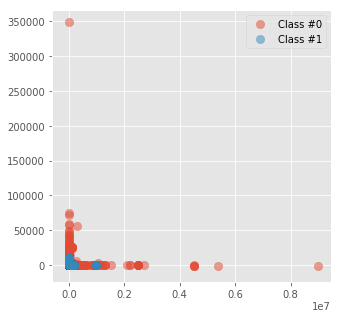

Target percentage 0.2
y.shape =  172405 y.mean() =  0.2


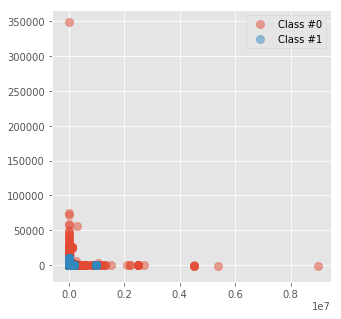

Target percentage 0.3
y.shape =  197034 y.mean() =  0.29999898494676047


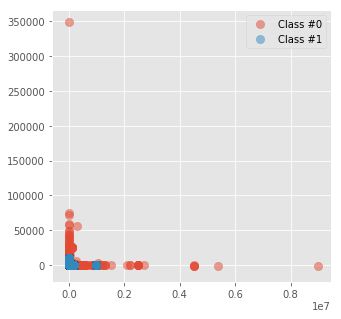

Target percentage 0.4
y.shape =  229873 y.mean() =  0.3999991299543661


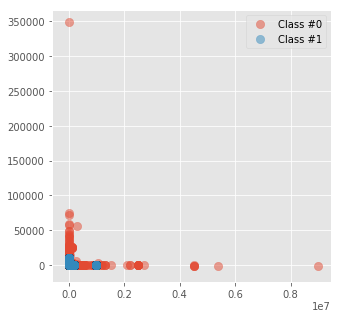

Target percentage 0.5
y.shape =  275848 y.mean() =  0.5


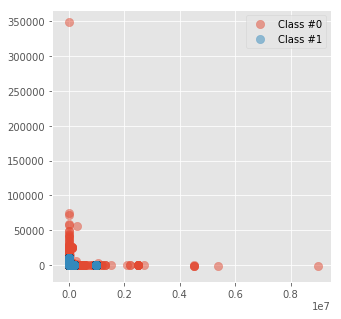

In [64]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

Sobre el metodo

SMOTE es un algoritmo muy conocido para combatir el problema de clases imbalanceadas. La idea general de este método es generar artificialmente nuevos ejemplos de la minoría o clase negativa usando los vecinos más cercanos de estos casos. Además,
Los ejemplos de la clase mayoritaria también están under-sampled, lo que lleva a un conjunto de datos más equilibrado.

In [47]:
# Number of nearest neighbours to used to construct synthetic samples.
k = 5
from sklearn.neighbors import NearestNeighbors
nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)

In [48]:
# Look for k-th nearest neighbours, excluding, of course, the
# point itself.#
nearest_neighbour_.fit(x_vis[y==1])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [49]:
# Matrix with k-th nearest neighbours indexes for each minority
# element.#
nns = nearest_neighbour_.kneighbors(x_vis[y==1], 
                                    return_distance=False)[:, 1:]

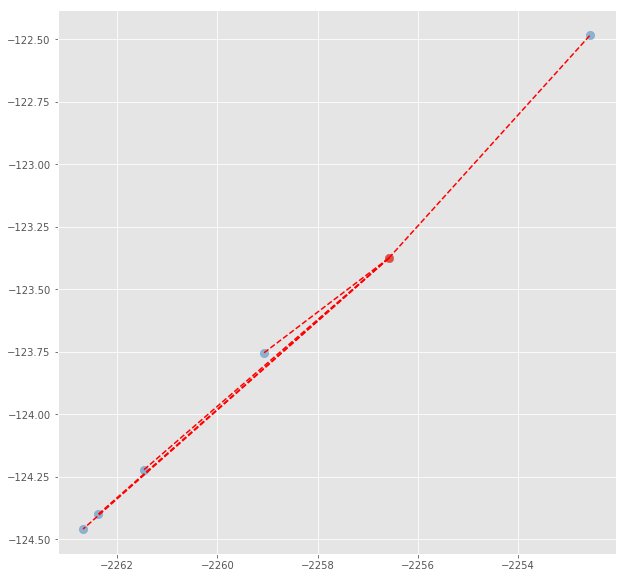

In [50]:
def base_smote_plot(sel, nns):
    fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    for i in range(len(sel)):
        # plot the select sample
        subplot.scatter(x_vis[y==1, 0][sel[i]], x_vis[y==1, 1][sel[i]],
                alpha=1., s=70)
        # plot the neighbors
        subplot.scatter(x_vis[y==1, 0][nns[sel[i]]], 
                        x_vis[y==1, 1][nns[sel[i]]],
                        alpha=0.5, s=70) 
        
        # plot the lines
        for nn in nns[sel[i]]:
            plt.plot([x_vis[y==1, 0][sel[i]], x_vis[y==1, 0][nn]],  
                     [x_vis[y==1, 1][sel[i]], x_vis[y==1, 1][nn]],
                     'r--') 
    
    xlim = subplot.get_xlim()
    ylim = subplot.get_ylim()
    subplot.scatter(x_vis[y==1, 0], x_vis[y==1, 1], alpha=0.1, s=70)
    subplot.set_xlim(xlim)
    subplot.set_ylim(ylim)
    return subplot
base_smote_plot([12],nns)

In [51]:
# Create syntetic sample for 12

# Select one random neighbor
np.random.seed(3)
nn_ = np.random.choice(nns[12])

x_vis[y==1][nn_]

array([-2261.47151061,  -124.22299393])

In [52]:
# Take a step of random size (0,1) in the direction of the
# n nearest neighbours
np.random.seed(5)
step = np.random.uniform()

# Construct synthetic sample
new = x_vis[y==1][12] - step * (x_vis[y==1][12] - x_vis[y==1][nn_])
new

array([-2257.66540129,  -123.56348667])

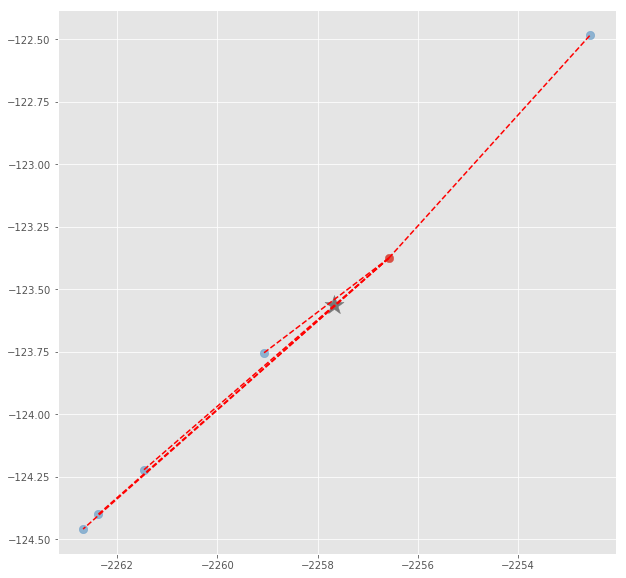

In [53]:
plot_ = base_smote_plot([12],nns)
plot_.scatter(new[0], new[1], alpha=1., s=400, marker="*")

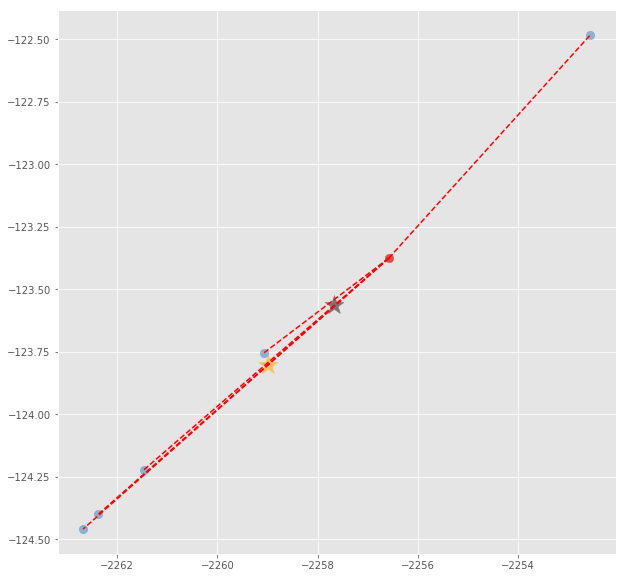

In [54]:
# Select one random neighbor
np.random.seed(5)
nn_2 = np.random.choice(nns[12])
np.random.seed(1)
step = np.random.uniform()
# Construct synthetic sample
new2 = x_vis[y==1][12] - step * (x_vis[y==1][12] - x_vis[y==1][nn_2])

plot_ = base_smote_plot([12],nns)
plot_.scatter(new[0], new[1], alpha=1., s=400, marker="*")
plot_.scatter(new2[0], new2[1], alpha=1., s=400, marker="*")

In [55]:
target_percentage = 0.5
n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1
n_samples_1_new = int(n_samples_1_new)
n_samples_1_new

137127

In [56]:
# A matrix to store the synthetic samples
new = np.zeros((n_samples_1_new, x_vis.shape[1]))

In [57]:
# Select examples to use as base
np.random.seed(34)
sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)

In [58]:
# Define random seeds (2 per example)
np.random.seed(64)
nn__ = np.random.choice(k, n_samples_1_new)
np.random.seed(65)
steps = np.random.uniform(size=n_samples_1_new)

In [59]:
# For each selected examples create one synthetic case
for i, sel in enumerate(sel_):
    # Select neighbor
    nn_ = nn__[i]
    step = steps[i]
    new[i, :] = x_vis[y==1][sel] - step * (x_vis[y==1][sel] - x_vis[y==1][nn_])

In [106]:
new

array([[ 5.47833247e+04,  1.28365729e+03],
       [ 6.84332481e+04, -1.80705446e+00],
       [-2.24174424e+03,  4.80161645e+02],
       ...,
       [-2.30611567e+03, -1.16739332e+02],
       [-2.09011532e+03, -9.96258736e+01],
       [ 5.77024671e+04, -2.10362853e+01]])

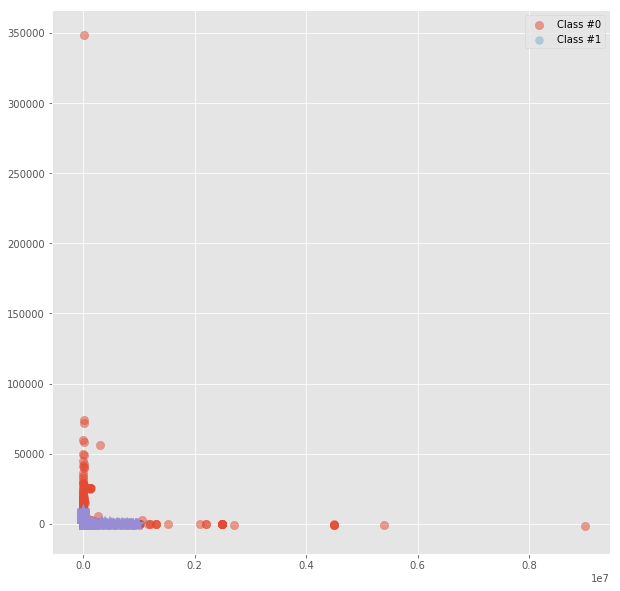

In [60]:
plot_ = plot_two_classes(x_vis, y, size=(10, 10))
plot_.scatter(new[:, 0], new[:, 1], alpha=0.5, s=150, marker='*')

In [108]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  183898 y.mean() =  0.24999728110148017


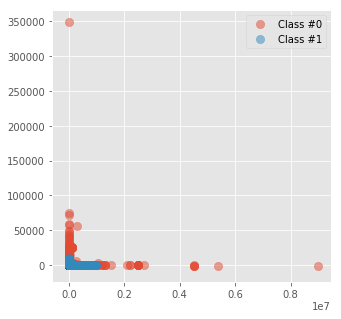

Target percentage 0.25 k  15
y.shape =  183898 y.mean() =  0.24999728110148017


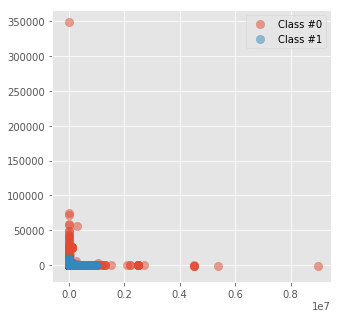

Target percentage 0.5 k  5
y.shape =  275848 y.mean() =  0.5


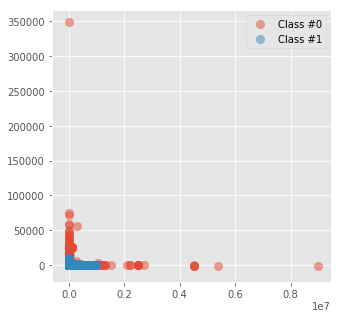

Target percentage 0.5 k  15
y.shape =  275848 y.mean() =  0.5


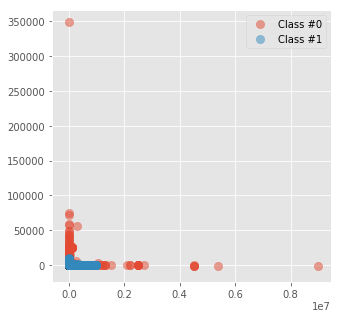

In [112]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(x_vis, y, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show() 

conclusiones

El parametro escogido es aquel que balancea las clases, en este caso hace referencia a los siguientes:

Target percentage 0.5 k  15
y.shape =  275848 y.mean() =  0.5


# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [14]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [91]:
X = data.drop(['Label'], axis=1)
y = data['Label']
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [6]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [83]:
y_train.head()

12062     0
58027     0
61010     0
19567     0
122268    0
Name: Label, dtype: int64

In [82]:
X_train.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
12062,1,1,0,0.00,0.00,5.064533,5.096396,4.369448,4.505025,0.000000,4.423575,149.79,149.79000,0.451985,4.524580
58027,1,1,0,0.00,0.00,0.510826,0.538996,3.935740,4.096793,0.000000,4.823671,113.97,113.97000,3.314976,4.461622
61010,2000,0,1,98.54,98.54,0.925769,1.232144,4.576642,4.634443,368.820833,4.874212,98.54,98.54000,4.041455,4.836982
19567,1,1,0,0.00,0.00,0.451985,0.510826,3.471156,3.468337,0.000000,3.588338,169.00,176.66415,3.587136,4.921318
122268,1,1,150,769.00,0.00,5.412885,1.477266,5.563677,3.429579,0.340972,2.628801,4.99,4.99000,2.625359,3.954522


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeRegressor(),
          'nb': GaussianNB(),
          'nn': KNeighborsRegressor()}

In [37]:
train=X_train
test=X_test

In [38]:
# Train all the models
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
#y_train 
#y_test 

for model in models.keys():
    models[model].fit(X_train, y_train)

In [39]:
# predict test for each model
y_pred = pd.DataFrame(index=test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [40]:
# Evaluate each model
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lr 0.07762959801550057
dt 0.1029182528781844
nb 0.08301434483301745
nn 0.08115966952946947


In [41]:

#Evaluate the error of the mean of the predictions
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

0.07741937920762867

Conclusiones: el modelo con menor error hace referencia a el modelo de regresión Logistica ya que tiene el menor MSE. le sigue el  KNeighborsRegresso. al combinar los clasificadores, el error es ligeramente mejor a todos los modelos por separado.

Algunas estadisticas de los modelos por sepadado se presentan a continuación

Accuracy

In [42]:
#Accuracy LogisticRegression

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.lr))


0.9939736455119518


In [48]:
#Accuracy DecisionTreeRegresso

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.nb))


0.9931086185519449


In [26]:
#Accuracy KNeighborsRegressor

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.nb))


0.99250309967994


F1-Score

Conclusiones: el modelo con menor error hace referencia a el modelo de regresión Logistica ya que tiene el menor MSE. le sigue el  KNeighborsRegresso. al combinar los clasificadores, el error es ligeramente mejor a todos los modelos por separado.

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

Random Forests es una ligera variación del método bagged trees el cualtiene un rendimiento aún mejor.

Exactamente como bagging, se crea un conjunto de árboles de decisión utilizando muestras del conjunto de entrenamiento bootstrap. Sin embargo, al construir cada árbol, cada vez que se considera una división, se elige una muestra aleatoria de características m como candidatos divididos del conjunto completo de características p. La división solo está permitida para usar una de esas características m.

Se elige una nueva muestra aleatoria de características para cada árbol en cada división. Para la clasificación, m se elige típicamente para ser la raíz cuadrada de p. Para la regresión, m se elige típicamente para estar en algún lugar entre p / 3 y p.

In [58]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

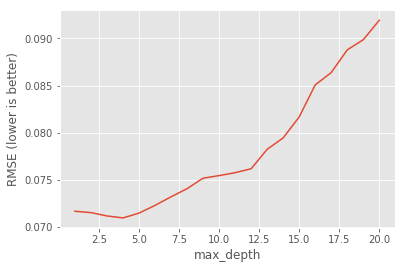

In [59]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [60]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.07096352767107293, 4)

In [61]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Usando la data de under-sampled del punto 4.2 se corre el Modelo.



In [64]:
#Tuning n_estimators
#One important tuning parameter is n_estimators, which is the number of trees that should be grown. 
#It should be a large enough value that the error seems to have "stabilized".

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

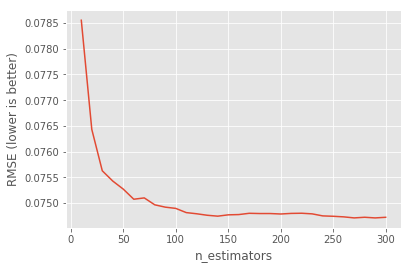

In [65]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

Fitting a Random Forest with the best parameters

In [66]:
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=150, max_features=8, max_depth=3, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [ ]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

In [68]:

#Reducing X to its most important features

# check the shape of X
X.shape

(138721, 15)

In [69]:
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [70]:
# set a threshold for which features to include
from sklearn.feature_selection import SelectFromModel
print(SelectFromModel(rfreg, threshold=0.1, prefit=True).transform(X).shape)
print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X).shape)

(138721, 2)
(138721, 3)
(138721, 8)


In [71]:
# create a new feature matrix that only includes important features
X_important = SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X)

In [72]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.07520423265277605

#conclusiones : el modelo se ajusta mejor cuando se usa la data que esta balancada. en este caso predice de ua mejor manera los casos de no fraude vs. los otros modelos.